In [3]:
import numpy as np
from numpy import load, arange, linspace
import matplotlib.pyplot as plt
from utils import box_plot

In [17]:
folder = "experiment26/"

EPSILONS = load(folder + "EPSILONS.npy")
ALPHAS   = load(folder + "ALPHAS.npy")
TS       = load(folder + "TS.npy")
TIME     = load(folder + "TIME.npy")
D        = int(load(folder + "D.npy"))

ESS_HUG    = load(folder + "ESS_HUG.npy")
ESS_J_HUG  = load(folder + "ESS_JOINT_HUG.npy")
A_HUG      = load(folder + "A_HUG.npy")
EJSD_HUG   = load(folder + "EJSD_HUG.npy")
G_EJSD_HUG = load(folder + "G_EJSD_HUG.npy")
T_EJSD_HUG = load(folder + "T_EJSD_HUG.npy")
A_HOP_HUG  = load(folder + "A_HOP_HUG.npy")

ESS_THUG    = load(folder + "ESS_THUG.npy")
ESS_J_THUG  = load(folder + "ESS_JOINT_THUG.npy")
A_THUG      = load(folder + "A_THUG.npy")
EJSD_THUG   = load(folder + "EJSD_THUG.npy")
G_EJSD_THUG = load(folder + "G_EJSD_THUG.npy")
T_EJSD_THUG = load(folder + "T_EJSD_THUG.npy")
A_HOP_THUG  = load(folder + "A_HOP_THUG.npy")

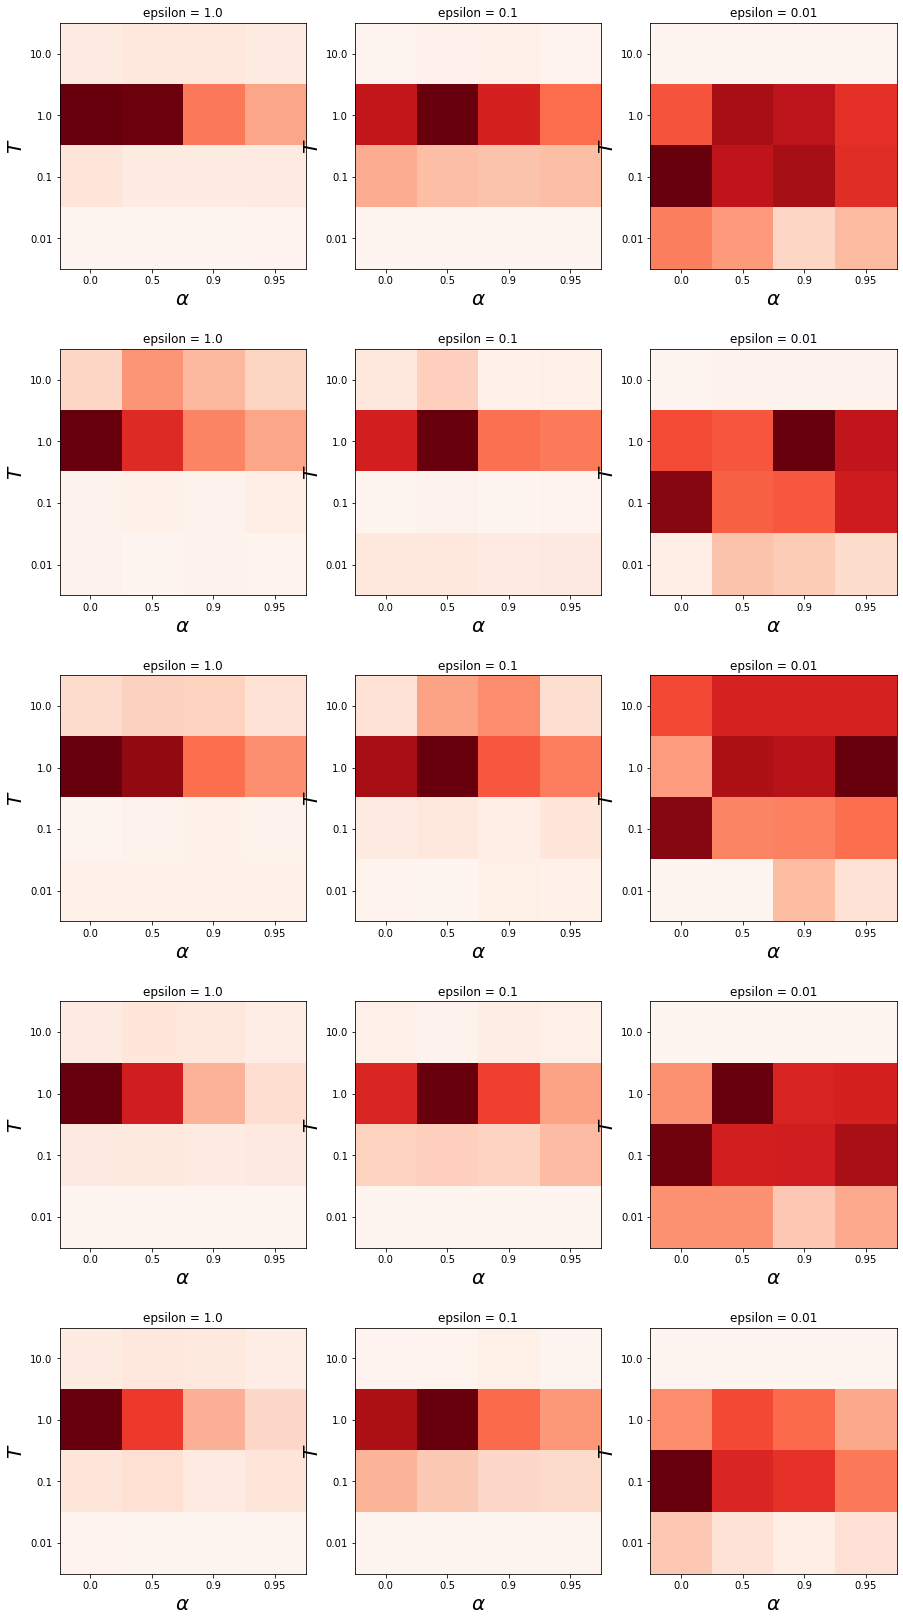

In [15]:
n_eps = len(EPSILONS)
fig, ax = plt.subplots(nrows=D, ncols=n_eps, figsize=(15,29))
for dim in range(D):
    # Get the ESS data
    data_list = [
        np.hstack((ESS_HUG[:, i, :, dim].mean(axis=0).reshape(-1, 1), ESS_THUG[:, i, :, :, dim].mean(axis=0))) for i in range(n_eps)
    ]
    string_ts = [str(T) for T in TS]
    string_alphas = ['0.0'] + [str(a) for a in ALPHAS]
    # Normalize data
#     max_val = np.max([np.max(data) for data in data_list])
#     data_list = [data / max_val for data in data_list]
#     data_list = [data / np.max(data) for data in data_list]
    for i in range(n_eps):
        ax[dim, i].imshow(data_list[i], cmap='Reds')
        # draw gridlines
        #ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
        ax[dim, i].set_xticks(np.arange(0.0, len(string_alphas)-0.5, 1));
        ax[dim, i].set_yticks(np.arange(0.0, len(string_ts)-0.5, 1));
        ax[dim, i].set_xticklabels(string_alphas)
        ax[dim, i].set_yticklabels(string_ts)
        ax[dim, i].set_xlabel('$\\alpha$', fontsize=20)
        ax[dim, i].set_ylabel('$T$', fontsize=20)
        ax[dim, i].set_title("epsilon = {}".format(EPSILONS[i]))
        ax[dim, i].set_xlim(-0.5, len(string_alphas)-0.5)
        ax[dim, i].set_ylim(len(string_ts)-0.5, -0.5)
plt.show()

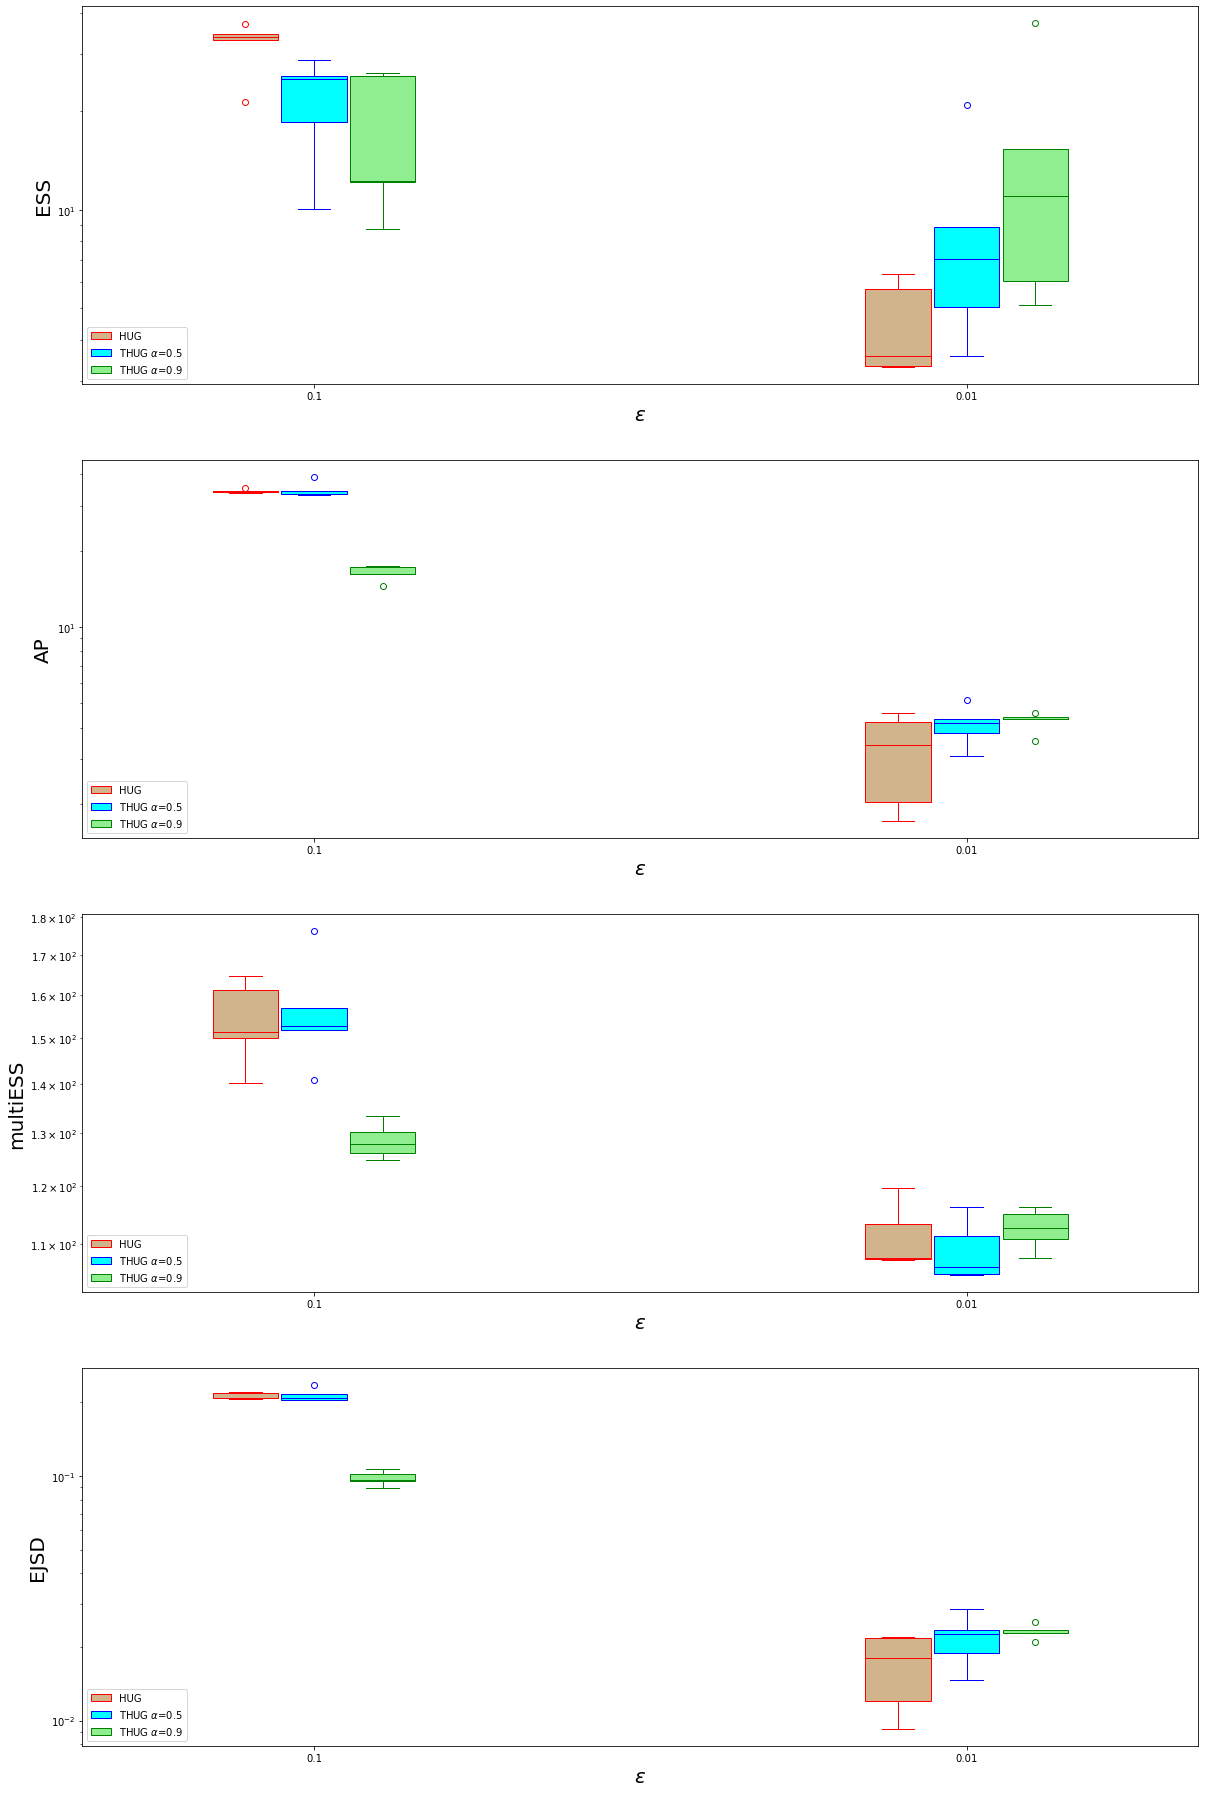

In [46]:
columns = EPSILONS
width = 0.21
thing_that_changes = ALPHAS
n_alphas = len(thing_that_changes)
ticks = arange(start=1, stop=len(columns)*2, step=2)
n_boxes = n_alphas + 1
disp = linspace(-width * (n_boxes-1) / 2, width * (n_boxes-1) / 2, n_boxes, endpoint=True)
positions = disp.reshape(-1, 1) + ticks
colors1 = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'black']
colors2 = ['tan', 'cyan', 'lightgreen', 'yellow', 'violet', 'orange', 'lightgray']
labels = ['HUG'] + ['THUG $\\alpha$={}'.format(thing) for thing in thing_that_changes]


int_time = 0
dim = 1

ARRAYS = [
    (ESS_HUG[:,:,int_time, dim], ESS_THUG[:,:,int_time,:, dim]),
    (A_HUG[:,:,int_time], A_THUG[:,:,int_time,:]),
    (ESS_J_HUG[:,:,int_time], ESS_J_THUG[:,:,int_time,:]),
    (EJSD_HUG[:,:,int_time], EJSD_THUG[:,:,int_time,:])
]
YLABELS = [
    'ESS', 
    'AP',
    'multiESS',
    'EJSD'
]
n_plots = len(ARRAYS)
fig, ax = plt.subplots(nrows=n_plots, figsize=(20, 8 * n_plots))
for ix, (array1, array2) in enumerate(ARRAYS):
    bp1 = box_plot(ax[ix], array1.T.tolist(), 'red', 'tan', positions[0])
    bps = []
    for i in range(n_alphas):
        bps.append(box_plot(ax[ix], array2[:,:,i].T.tolist(), colors1[i+1], colors2[i+1], positions[i+1]))
    handles = [bp1["boxes"][0]] + [bp["boxes"][0] for bp in bps]
    ax[ix].legend(
        handles, 
        labels, 
        loc='lower left')
    ax[ix].set_xticks(ticks)
    ax[ix].set_xticklabels(columns)
    ax[ix].set_xlabel("$\\epsilon$", fontsize=20)
    ax[ix].set_ylabel(YLABELS[ix], fontsize=20)
    ax[ix].semilogy()

plt.show()

In [77]:
ESS_J_HUG[:, 0, :].mean(axis=0)

array([154.22781605, 296.36022654, 163.17087994, 150.31927215])

In [81]:
ESS_J_THUG[:, 0, :, :].mean(axis=0).T

array([[160.29664315, 287.65585971, 161.95620884, 150.06986605],
       [158.85498358, 221.0838571 , 162.41450046, 150.0530519 ],
       [153.33585196, 208.62342902, 160.43696461, 150.34997026]])

In [68]:
ESS_HUG[:, 0, 0, :].mean(axis=0)

array([181.21278406,  22.40866117,  37.50969155,  87.76306894,
        87.08866982])

In [43]:
ESS_THUG[:, -1, 0, :, 1].mean(axis=0)

array([ 9.07046665, 14.91617981])

In [66]:
A_HOP_HUG[:, 1, :].mean(axis=0)

array([91.402, 91.616, 89.16 , 92.36 ])

In [67]:
A_HOP_THUG[:, 1, :, 0].mean(axis=0)

array([91.252, 91.244, 89.058, 93.018])